In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [7]:
data = pd.read_csv("kdd_test.csv")


In [15]:
print("Dataset loaded successfully!")
print("Shape:", data.shape)
print("\nColumns:", data.columns.tolist())
print("\nFirst 5 rows:\n", data.head())

Dataset loaded successfully!
Shape: (22544, 42)

Columns: ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'labels']

First 5 rows:
    duration protocol_type   service  flag  src_bytes  dst_bytes  land  \
0         5           tcp      smtp    SF       2429        475     0   
1         0           udp  domain_u    SF

In [29]:
# Step 3: Define target column
target_column = "labels"  # <-- this is your correct label column


In [31]:
X = data.drop(columns=[target_column])
y = data[target_column]


In [33]:
le = LabelEncoder()
y = le.fit_transform(y)

In [35]:
X = pd.get_dummies(X, drop_first=True)


In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [43]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [45]:
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=500),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

In [47]:
results = {}


In [49]:
for name, model in models.items():
    print(f"\n🔹 Training {name}...")
    model.fit(X_train_scaled, y_train)
    print(f"{name} trained successfully!")

    print(f"\nEvaluating {name}...")
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc * 100
    print(f"Accuracy: {acc * 100:.2f}%")

    print("Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))



🔹 Training Logistic Regression...
Logistic Regression trained successfully!

Evaluating Logistic Regression...
Accuracy: 97.43%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        42
           1       0.97      1.00      0.99        33
           2       0.40      0.33      0.36         6
           4       0.96      0.99      0.97        90
           5       0.86      1.00      0.92         6
           6       0.00      0.00      0.00         1
           7       0.95      0.93      0.94        82
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         1
          10       0.80      1.00      0.89        20
          11       0.98      0.96      0.97        56
          12       0.00      0.00      0.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00      1374
          15       0.73      0.95    

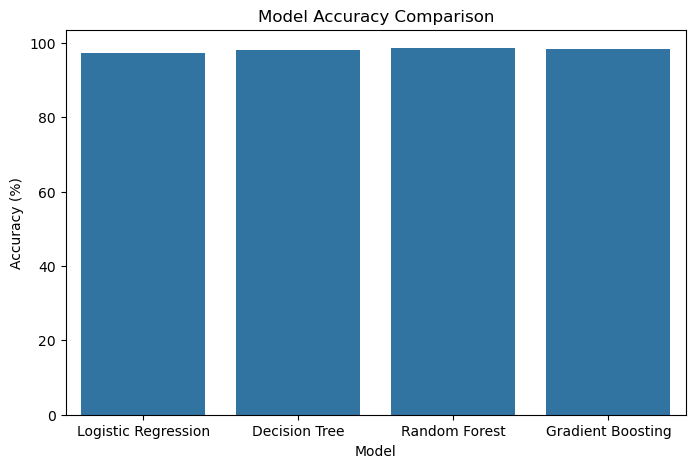

In [59]:
plt.figure(figsize=(8, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy (%)")
plt.xlabel("Model")
plt.show()